# **Uniformly Random Graphs**

<hr></hr>

###  **Sections**
1. Implementing
2. Degree
3. Connected Components
4. Phase Transition
5. Histogram of the component size in the phase transition
6. Algorithms
7. Libraries

<hr></hr>

### **1. Implementing**

<hr></hr>

#### First of all, a uniformly radom graph is characterised by the number of nodes, N, and the probability of two nodes being connected, p. 

In [10]:
N = 300
p = 0.01

In [11]:
G = nx.Graph(create_graph_RE(N, p, 1))

In [12]:
options = {
    'node_color': 'green',
    'node_size': 20,
    'width': 1,
}

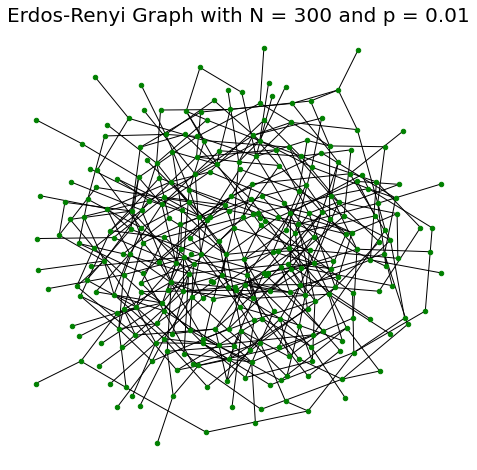

In [13]:
plt.figure(figsize=(8, 8))
plt.title(f"Erdos-Renyi Graph with N = {N} and p = {p}", fontsize=20)
nx.draw_kamada_kawai(G, **options)

<hr></hr>

### **2. Degree**

<hr></hr>

#### As the probablity distribution of a node be connected to any of the each others is a Bernoulli, with p = 0.01, so the degree of a node, $ K $, has a Binomial Distributuion, with N -1 and p = 0.01. And hence
$$ \overline K = p(N-1) = 2.99 $$

In [36]:
k = np.array(G.degree)
k_m = k[:,1].sum()/len(k)

x = np.arange(0,300)

Text(0.5, 1.0, 'Degree Occurrence')

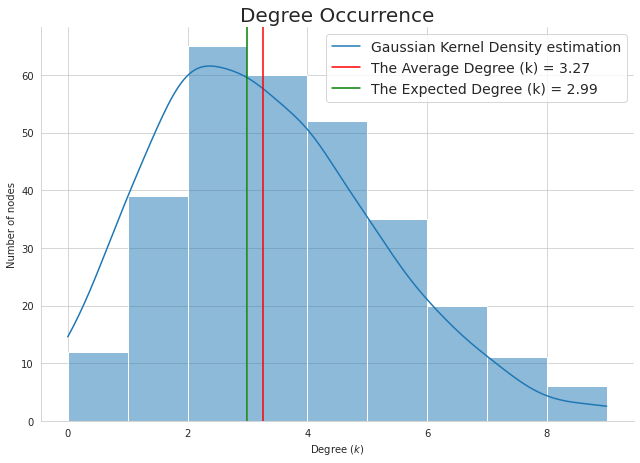

In [37]:
sn.set_style("whitegrid")
ax = sn.displot(k[:,1], binwidth=1, kde= True, height=6, aspect=1.5)
ax.set(xlabel="Degree ($k$)", ylabel = "Number of nodes")
plt.axvline(k_m, 0, c='r')
plt.axvline(2.99, 0, c='g')
plt.legend(['Gaussian Kernel Density estimation', f'The Average Degree (k) = {k_m:.2f}', f'The Expected Degree (k) = {2.99:.2f}'], fontsize=14)
plt.title(f"Degree Occurrence", fontsize=20)

<hr></hr>

### **3. Connected Components**

<hr></hr>

In [44]:
start = time.time()
p, c, s, n = samples_graph_RE(0.0, 0.03, 0.0001, 300, 30)
end = time.time()
print(end - start)

82.9807505607605


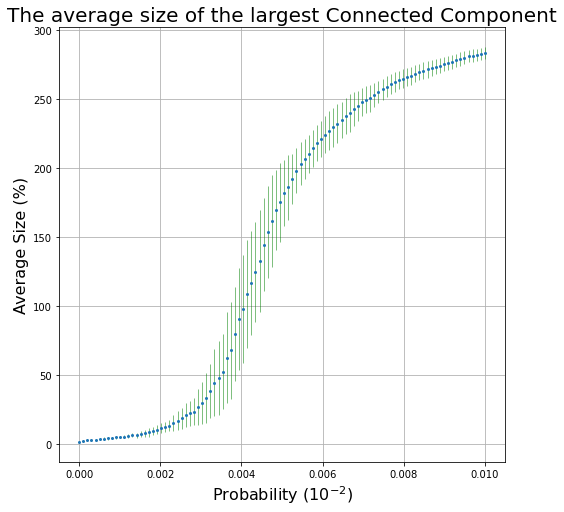

In [41]:
plt.figure(figsize=(8, 8))
plt.errorbar(p, c, s, linestyle='None', marker='o', markersize=2, linewidth=0.5, ecolor='g')
plt.title('The average size of the largest Connected Component', fontsize = 20)
plt.xlabel('Probability ($10^{-2})$', fontsize = 16)
plt.ylabel('Average Size (%)', fontsize = 16)
plt.grid(True)

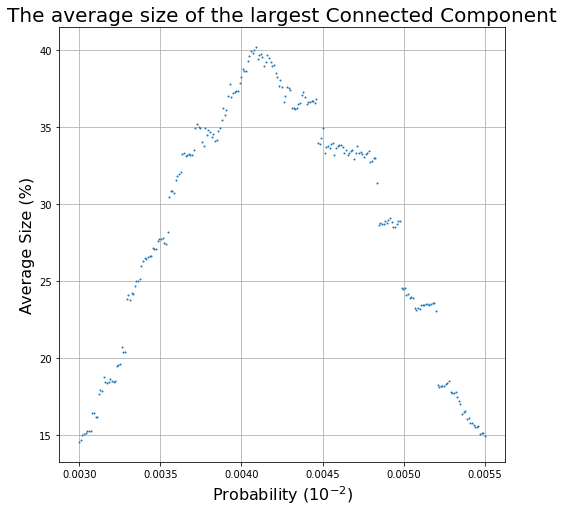

In [100]:
plt.figure(figsize=(8, 8))
plt.plot(p, s, 'o', markersize=1)
plt.title('The average size of the largest Connected Component', fontsize = 20)
plt.xlabel('Probability ($10^{-2})$', fontsize = 16)
plt.ylabel('Average Size (%)', fontsize = 16)
plt.grid(True)

<hr></hr>

### **4. Phase Transition**

<hr></hr>

#### First, to observe the phase transition, we restrict the sample to the probablity interval of $[0, 0.01]$

In [83]:
start = time.time()
p, c, s, n = samples_graph_RE(0.003, 0.0055, 0.00001, 300, 30)
end = time.time()
print("Time spent processing: ",end - start)

Time spent processing:  57.192646503448486


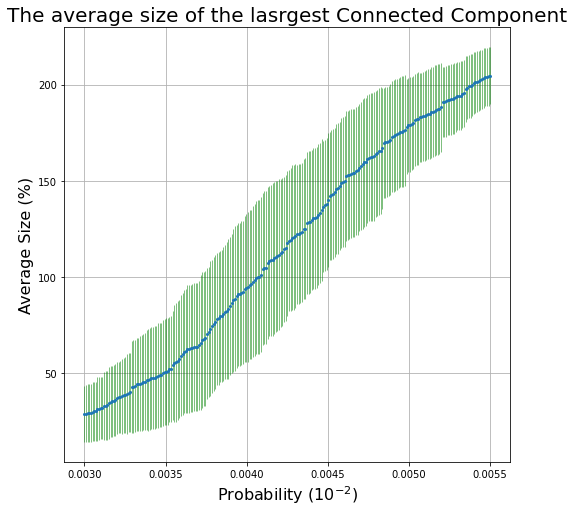

In [84]:
plt.figure(figsize=(8, 8))
plt.errorbar(p, c, s, linestyle='None', marker='o', markersize=2, linewidth=0.5, ecolor='g')
plt.title('The average size of the lasrgest Connected Component', fontsize = 20)
plt.xlabel('Probability ($10^{-2})$', fontsize = 16)
plt.ylabel('Average Size (%)', fontsize = 16)
plt.grid(True)

#### And now, using the finit methods, we can calculate the point of maximun growth, by the expression: $$\Delta f = f(x + h) - f(x) $$

In [85]:
df = np.zeros(n -1)
dstd  = np.zeros(n -1)

for i in range(1,n -1):
    df[i] = c[i+1] - c[i] 
    dstd[i] = s[i+1] + s[i]

In [86]:
dfdp = df/(p[1]-p[0])

In [87]:
max_growth = p[list(dfdp).index(max(dfdp))]

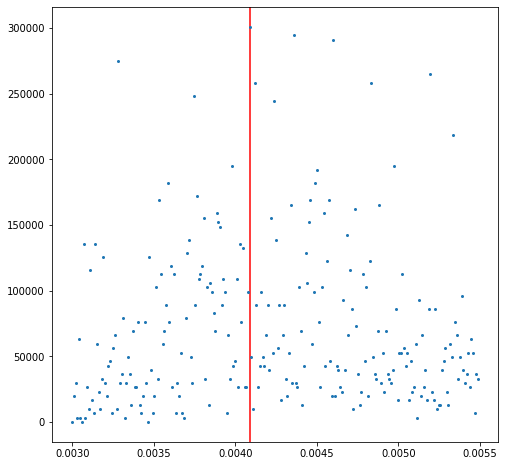

In [88]:
plt.figure(figsize=(8, 8))
plt.axvline(max_growth, 0, c='r')
plt.plot(p[:n -1], dfdp, markersize=2, marker='o', linestyle='None')

In [89]:
popt, pcov = curve_fit(sigmoid, p, c/max(c))

In [91]:
popt

array([1948.72340704,    7.92677539])

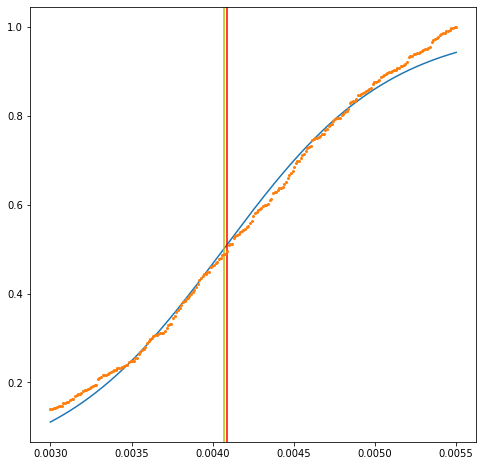

In [94]:
plt.figure(figsize=(8, 8))
plt.plot(p, sigmoid(p, *popt))
plt.axvline(0.00407, 0, c='y')
plt.axvline(max_growth, 0, c='r')
plt.plot(p, c/max(c),linestyle='None', marker='o', markersize=2,)

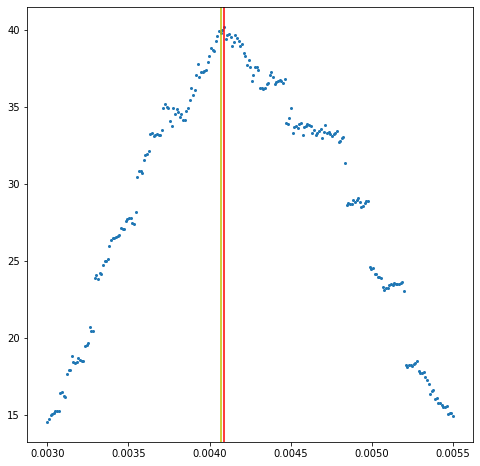

In [106]:
plt.figure(figsize=(8, 8))
plt.plot(p, s, 'o', markersize = 2)
plt.axvline(0.00407, 0, c='y')
plt.axvline(max_growth, 0, c='r')

<hr></hr>

### **5. Histogram of the component size in the phase transition**

<hr></hr>

In [109]:
fit_max_growth = 0.00407
finit_max_grouth = max_growth

In [114]:
fit_s_connected_components = samples_graph(300, fit_max_growth, 1000)
finit_s_connected_components = samples_graph(300, finit_max_grouth, 1000)

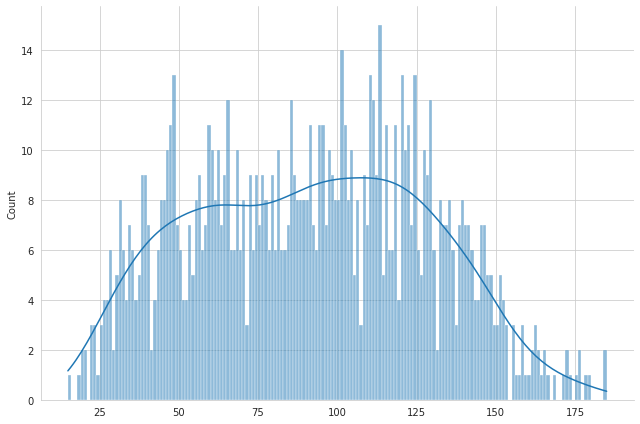

In [115]:
sn.set_style("whitegrid")
ax = sn.displot(fit_s_connected_components, binwidth=1, kde= True, height=6, aspect=1.5)

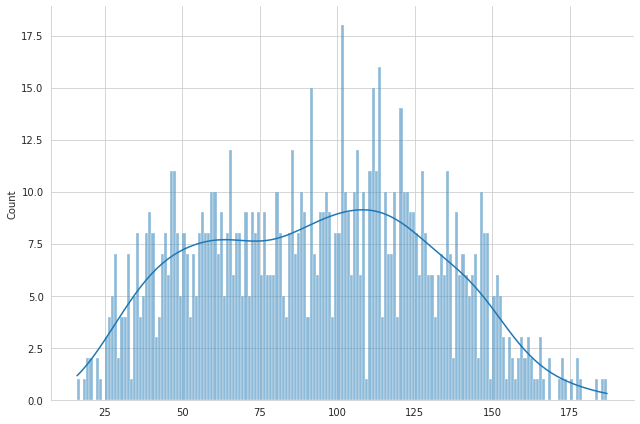

In [116]:
sn.set_style("whitegrid")
ax = sn.displot(finit_s_connected_components, binwidth=1, kde= True, height=6, aspect=1.5)

In [117]:
min_s_connected_components = samples_graph(300, 0.003, 1000)
max_s_connected_components = samples_graph(300, 0.0055, 1000)

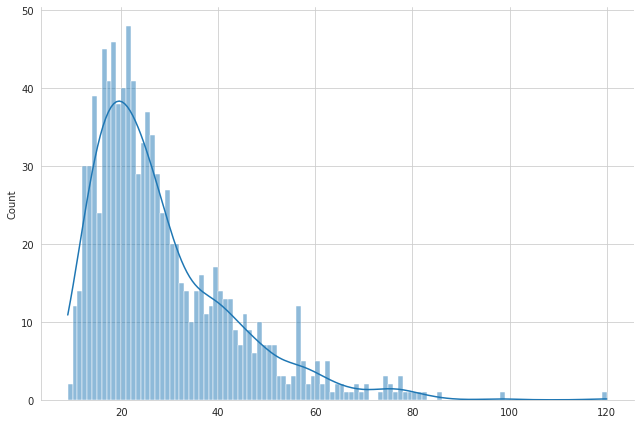

In [118]:
sn.set_style("whitegrid")
ax = sn.displot(min_s_connected_components, binwidth=1, kde= True, height=6, aspect=1.5)

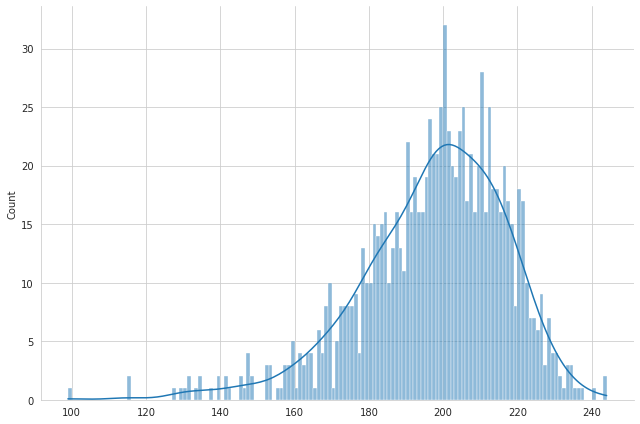

In [119]:
sn.set_style("whitegrid")
ax = sn.displot(max_s_connected_components, binwidth=1, kde= True, height=6, aspect=1.5)

<hr></hr>

### **5. Algorithms**

<hr></hr>

In [55]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [30]:
def sigmoid(x, m, b):
    return 1/(1 + np.exp(-m*x+b))

In [108]:
def samples_graph(size, p, n_sample):
    
    ncc = []
    
    for seed in range(n_sample):
        
        G = nx.Graph(create_graph_RE(size, p, seed))
        largest_cc = max(nx.connected_components(G), key=len)
        largest_cc = max(nx.connected_components(G), key=len)
        ncc.append(len(largest_cc))
        
    return ncc

In [1]:
def samples_graph_RE(p_init, p_final, p_pass, size, n_sample):
    
    probabilitys = np.linspace(p_init, p_final, int((p_final - p_init)/p_pass))
    
    connected_components = []
    std = []
    
    for p in probabilitys:
        ncc = np.zeros(n_sample)
        
        for seed in range(n_sample):
        
            G = nx.Graph(create_graph_RE(size, p, seed))
            largest_cc = max(nx.connected_components(G), key=len)
            ncc[seed] = len(largest_cc)
    
        connected_components.append(ncc.mean())
        std.append(np.sqrt(ncc.var()))
    
    return (probabilitys, connected_components, std, len(probabilitys))

In [2]:
class Graph:
    def __init__(self, N, direct = False):
        self.N = N 
        self.direct = direct
        self.matrix_represetation =[]
    
    def add_egde(self, i, j, w = 1):
        self.matrix_represetation[i][j] = w
        if not self.direct:
            self.matrix_represetation[j][i] = w
     
    def create_graph(self, tp, args):
        if tp == 're':
            self.matrix_represetation = create_graph_RE(self.N,**args)
        
    def dfs(self, node, visited, not_found, size = 1):
        
        n = node
        
        visited.append(n)
        not_found.remove(n)
        
        for i in not_found:
            if(self.matrix_represetation[n][i] and i not in visited):
                visited, size = self.dfs(i, visited, not_found, size+1)
                
        
        return (visited, size)
    
    def connected_components(self):
        connected = []
        nodes = list(range(self.N))
        
        bigger = 1
        
        while nodes != []:
            new_connected_components, n = self.dfs(nodes[0],[],nodes)
            
            connected.append(new_connected_components)
            
            if bigger < n:
                bigger = n
        
        return (connected, bigger)

In [3]:
def create_graph_RE(N, p, seed = 42):
    random.seed(seed)
    
    connections = np.zeros((N,N), dtype = 'i')
    
    for i in range(N-1):
        for j in range(i+1, N):
            if random.random() < p:
                connections[i][j] = 1
                connections[j][i] = 1
                
    return connections

<hr></hr>

### **5. Libraries**

<hr></hr>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import networkx as nx
import time
from scipy.optimize import curve_fit